In [225]:
#importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [226]:
# reading the dataset
df = pd.read_csv('/Users/shradhachoudhary/Downloads/conversion_data.csv')

In [227]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

We have no missing data

In [229]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


we can see that the categorical and numerical value through this. The unique values of the respective columns and also the min and max values for the same.

In [230]:
df.isnull().sum()

Unnamed: 0           0
visitor_id           0
visitor_location     0
marketing_channel    0
gender               0
product_views_Mon    0
product_views_Tue    0
product_views_Wed    0
product_views_Thu    0
product_views_Fri    0
avg_rating_Mon       0
avg_rating_Tue       0
avg_rating_Wed       0
avg_rating_Thu       0
avg_rating_Fri       0
avg_price_Mon        0
avg_price_Tue        0
avg_price_Wed        0
avg_price_Thu        0
avg_price_Fri        0
time_on_site_Mon     0
time_on_site_Tue     0
time_on_site_Wed     0
time_on_site_Thu     0
time_on_site_Fri     0
pages_visited_Mon    0
pages_visited_Tue    0
pages_visited_Wed    0
pages_visited_Thu    0
pages_visited_Fri    0
converted_Fri        0
dtype: int64

no missing values can be seen

In [231]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

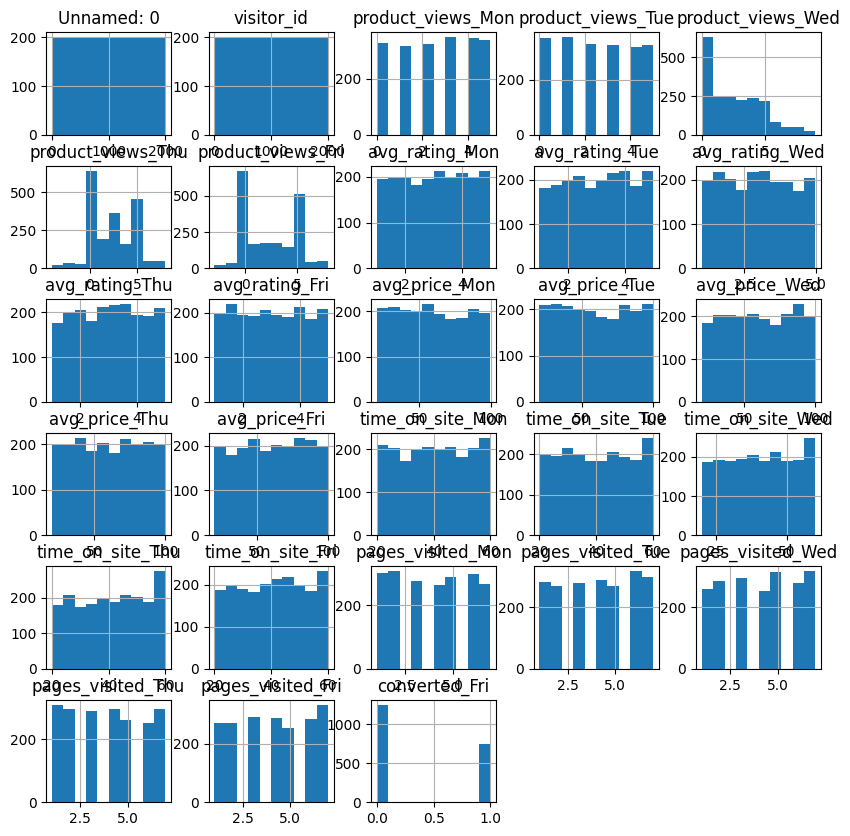

In [232]:
df.hist(figsize=(10, 10))
plt

through these graphs we can see that the data is mostly evenly distributed as there is no skewness in the graphs.

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

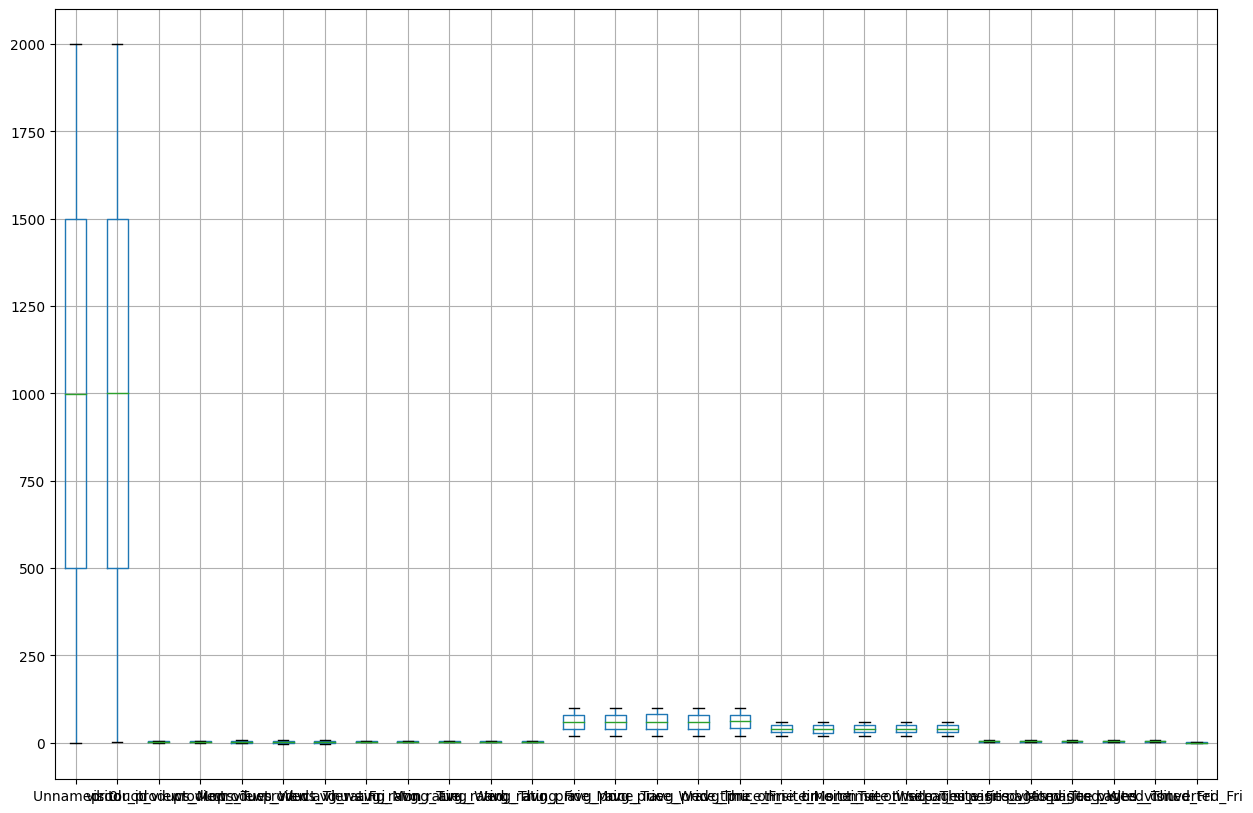

In [233]:
df.boxplot(figsize=(15, 10))
plt

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

Question 1.  what are the characteristics of users who convert (behavioural and demographic)?
the main characterstics of users who convert are gender, location, visitor_location and marketing_channel

Now let's do some analysis to understand differences between users. Before we design the experiment, we need to make sure the users are similar in behaviour. This means that users shouldn't have significant differences between the products they view, average reatings, average price, time spent on site and pages visited. We should compare users by Location, marketing chnnel and Gender. We can use statistical tests to support our analysis.

In [235]:
df['product_views_5days'] = df['product_views_Mon'] + df['product_views_Tue'] + df['product_views_Wed'] + df['product_views_Thu'] + df['product_views_Fri']

In [236]:
df['avg_rating_5days'] = df['avg_rating_Mon'] + df['avg_rating_Tue'] + df['avg_rating_Wed'] + df['avg_rating_Thu'] + df['avg_rating_Fri']

In [237]:
df['avg_price_5days'] = df['avg_price_Mon'] + df['avg_price_Tue'] + df['avg_price_Wed'] + df['avg_price_Thu'] + df['avg_price_Fri']

In [238]:
df['time_on_site_5days'] = df['time_on_site_Mon'] + df['time_on_site_Tue'] + df['time_on_site_Wed'] + df['time_on_site_Thu'] + df['time_on_site_Fri']

In [239]:
df['pages_visited_5days'] = df['pages_visited_Mon'] + df['pages_visited_Tue'] + df['pages_visited_Wed'] + df['pages_visited_Thu'] + df['pages_visited_Fri']

combining the columns for easier working 

In [240]:
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,product_views_5days,avg_rating_5days,avg_price_5days,time_on_site_5days,pages_visited_5days
0,0,1,North America,youtube,M,4,5,2,1,2,...,5,5,4,6,1,14,15.67,273.69,216,24
1,1,2,South America,organic,F,2,5,0,1,5,...,6,7,6,2,0,13,10.34,357.16,166,26
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,3,3,2,3,1,9,18.33,321.79,144,12
3,3,4,North America,facebook,M,1,0,0,5,0,...,4,7,7,1,0,6,16.50,280.24,186,22
4,4,5,Asia,instagram,F,1,5,2,2,3,...,6,5,2,4,1,13,11.82,232.21,223,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,1,5,7,7,0,9,15.04,286.30,178,25
1996,1996,1997,South America,google,M,1,2,0,4,1,...,6,6,7,6,0,8,9.29,228.51,228,26
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,1,7,6,4,0,13,16.40,262.72,174,20
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,4,2,2,3,1,16,18.31,258.76,189,17


In [241]:
# Grouping By location
df.groupby('visitor_location')[['product_views_5days','avg_rating_5days','avg_price_5days','time_on_site_5days','pages_visited_5days','converted_Fri']].mean()

,product_views_5days,avg_rating_5days,avg_price_5days,time_on_site_5days,pages_visited_5days,converted_Fri
visitor_location,,,,,,
Asia,11.921409,15.135528,301.702304,199.048780,19.853659,0.373984
Australia,11.838710,14.968040,301.054467,200.647643,19.967742,0.334988
Europe,12.331593,15.008146,300.744178,198.339426,19.809399,0.386423
North America,11.633495,15.046141,299.008956,200.718447,20.669903,0.351942
South America,12.427252,15.110323,299.943580,201.736721,20.240185,0.411085


This looks mostly the same. Let's use an ANOVA test to validate each metric. If they are statistically the same, they should have a HIGH p-value.

In [242]:

df['visitor_location'].unique()

array(['North America', 'South America', 'Australia', 'Asia', 'Europe'],
      dtype=object)

In [243]:
# checking product views
from scipy import stats


North_America = df[df['visitor_location'] == 'North America']['product_views_5days']
South_America = df[df['visitor_location'] == 'South America']['product_views_5days']
Australia = df[df['visitor_location'] == 'Australia']['product_views_5days']
Asia = df[df['visitor_location'] == 'Asia']['product_views_5days']
Europe = df[df['visitor_location'] == 'Europe']['product_views_5days']

p_val = stats.f_oneway(North_America, South_America, Australia,Asia,Europe)
print(p_val)

F_onewayResult(statistic=1.9938870826070512, pvalue=0.0929193745613309)


In [244]:
North_America = df[df['visitor_location'] == 'North America']['avg_rating_5days']
South_America = df[df['visitor_location'] == 'South America']['avg_rating_5days']
Australia = df[df['visitor_location'] == 'Australia']['avg_rating_5days']
Asia = df[df['visitor_location'] == 'Asia']['avg_rating_5days']
Europe = df[df['visitor_location'] == 'Europe']['avg_rating_5days']

p_val = stats.f_oneway(North_America, South_America, Australia,Asia,Europe)
print(p_val)

F_onewayResult(statistic=0.27788965657844056, pvalue=0.8923945686346665)


In [245]:
North_America = df[df['visitor_location'] == 'North America']['avg_price_5days']
South_America = df[df['visitor_location'] == 'South America']['avg_price_5days']
Australia = df[df['visitor_location'] == 'Australia']['avg_price_5days']
Asia = df[df['visitor_location'] == 'Asia']['avg_price_5days']
Europe = df[df['visitor_location'] == 'Europe']['avg_price_5days']

p_val = stats.f_oneway(North_America, South_America, Australia,Asia,Europe)
print(p_val)

F_onewayResult(statistic=0.16434965645422067, pvalue=0.9564505794051565)


In [247]:
North_America = df[df['visitor_location'] == 'North America']['
                                                              ']
South_America = df[df['visitor_location'] == 'South America']['time_on_site_5days']
Australia = df[df['visitor_location'] == 'Australia']['time_on_site_5days']
Asia = df[df['visitor_location'] == 'Asia']['time_on_site_5days']
Europe = df[df['visitor_location'] == 'Europe']['time_on_site_5days']

p_val = stats.f_oneway(North_America, South_America, Australia,Asia,Europe)
print(p_val)

F_onewayResult(statistic=1.1637815998515824, pvalue=0.32489888124770605)


In [79]:

North_America = df[df['visitor_location'] == 'North America']['pages_visited_5days']
South_America = df[df['visitor_location'] == 'South America']['pages_visited_5days']
Australia = df[df['visitor_location'] == 'Australia']['pages_visited_5days']
Asia = df[df['visitor_location'] == 'Asia']['pages_visited_5days']
Europe = df[df['visitor_location'] == 'Europe']['pages_visited_5days']

p_val = stats.f_oneway(North_America, South_America, Australia,Asia,Europe)
print(p_val)

F_onewayResult(statistic=2.517257391679445, pvalue=0.039614684887139394)


In [248]:

North_America = df[df['visitor_location'] == 'North America']['converted_Fri']
South_America = df[df['visitor_location'] == 'South America']['converted_Fri']
Australia = df[df['visitor_location'] == 'Australia']['converted_Fri']
Asia = df[df['visitor_location'] == 'Asia']['converted_Fri']
Europe = df[df['visitor_location'] == 'Europe']['converted_Fri']

p_val = stats.f_oneway(North_America, South_America, Australia,Asia,Europe)
print(p_val)

F_onewayResult(statistic=1.5638504686719144, pvalue=0.18132607322126695)


avg_price_5days and avg_rating_5days show a higher p value that means they behave differently to the visitor_location so we can not assign them to any variant of our experiment.

## Let's check the same for marketing channel

In [81]:
df['marketing_channel'].unique()


array(['youtube', 'organic', 'instagram', 'facebook', 'google'],
      dtype=object)

In [249]:
youtube = df[df['marketing_channel'] == 'youtube']['product_views_5days']
organic = df[df['marketing_channel'] == 'organic']['product_views_5days']
instagram = df[df['marketing_channel'] == 'instagram']['product_views_5days']
facebook = df[df['marketing_channel'] == 'facebook']['product_views_5days']
google = df[df['marketing_channel'] == 'google']['product_views_5days']

p_val = stats.f_oneway(youtube, organic, instagram,facebook,google)
print(p_val)

F_onewayResult(statistic=1.2571139125237927, pvalue=0.2847780695559677)


In [250]:
youtube = df[df['marketing_channel'] == 'youtube']['avg_rating_5days']
organic = df[df['marketing_channel'] == 'organic']['avg_rating_5days']
instagram = df[df['marketing_channel'] == 'instagram']['avg_rating_5days']
facebook = df[df['marketing_channel'] == 'facebook']['avg_rating_5days']
google = df[df['marketing_channel'] == 'google']['avg_rating_5days']

p_val = stats.f_oneway(youtube, organic, instagram,facebook,google)
print(p_val)

F_onewayResult(statistic=1.0681905706037864, pvalue=0.3706549146930232)


In [251]:
youtube = df[df['marketing_channel'] == 'youtube']['avg_price_5days']
organic = df[df['marketing_channel'] == 'organic']['avg_price_5days']
instagram = df[df['marketing_channel'] == 'instagram']['avg_price_5days']
facebook = df[df['marketing_channel'] == 'facebook']['avg_price_5days']
google = df[df['marketing_channel'] == 'google']['avg_price_5days']

p_val = stats.f_oneway(youtube, organic, instagram,facebook,google)
print(p_val)

F_onewayResult(statistic=0.619408577912305, pvalue=0.6486983599967637)


In [252]:
youtube = df[df['marketing_channel'] == 'youtube']['time_on_site_5days']
organic = df[df['marketing_channel'] == 'organic']['time_on_site_5days']
instagram = df[df['marketing_channel'] == 'instagram']['time_on_site_5days']
facebook = df[df['marketing_channel'] == 'facebook']['time_on_site_5days']
google = df[df['marketing_channel'] == 'google']['time_on_site_5days']

p_val = stats.f_oneway(youtube, organic, instagram,facebook,google)
print(p_val)

F_onewayResult(statistic=0.2151344161983168, pvalue=0.9301184316139827)


In [253]:
youtube = df[df['marketing_channel'] == 'youtube']['pages_visited_5days']
organic = df[df['marketing_channel'] == 'organic']['pages_visited_5days']
instagram = df[df['marketing_channel'] == 'instagram']['pages_visited_5days']
facebook = df[df['marketing_channel'] == 'facebook']['pages_visited_5days']
google = df[df['marketing_channel'] == 'google']['pages_visited_5days']

p_val = stats.f_oneway(youtube, organic, instagram,facebook,google)
print(p_val)

F_onewayResult(statistic=0.9686997091179209, pvalue=0.42346893327648205)


In [254]:
youtube = df[df['marketing_channel'] == 'youtube']['converted_Fri']
organic = df[df['marketing_channel'] == 'organic']['converted_Fri']
instagram = df[df['marketing_channel'] == 'instagram']['converted_Fri']
facebook = df[df['marketing_channel'] == 'facebook']['converted_Fri']
google = df[df['marketing_channel'] == 'google']['converted_Fri']

p_val = stats.f_oneway(youtube, organic, instagram,facebook,google)
print(p_val)

F_onewayResult(statistic=10.41836073820754, pvalue=2.3690267963428732e-08)


time_on_site_5days and avg_price_5days show a higher p value that means they behave differently to the visitor_location so we can not assign them to any variant of our experiment.

## Let's check the same for Gender

In [255]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [256]:
M = df[df['gender'] == 'M']['product_views_5days']
F = df[df['gender'] == 'F']['product_views_5days']


p_val = stats.f_oneway(M,F)
print(p_val)

F_onewayResult(statistic=13.714602385022998, pvalue=0.00021856702281463565)


In [257]:
M = df[df['gender'] == 'M']['avg_rating_5days']
F = df[df['gender'] == 'F']['avg_rating_5days']


p_val = stats.f_oneway(M,F)
print(p_val)

F_onewayResult(statistic=0.006417375288100139, pvalue=0.9361589677035336)


In [258]:
M = df[df['gender'] == 'M']['avg_price_5days']
F = df[df['gender'] == 'F']['avg_price_5days']


p_val = stats.f_oneway(M,F)
print(p_val)

F_onewayResult(statistic=0.29101144877244395, pvalue=0.5896332074869863)


In [259]:
M = df[df['gender'] == 'M']['time_on_site_5days']
F = df[df['gender'] == 'F']['time_on_site_5days']


p_val = stats.f_oneway(M,F)
print(p_val)

F_onewayResult(statistic=1.4731555883208203, pvalue=0.22499192537894563)


In [260]:
M = df[df['gender'] == 'M']['pages_visited_5days']
F = df[df['gender'] == 'F']['pages_visited_5days']


p_val = stats.f_oneway(M,F)
print(p_val)

F_onewayResult(statistic=0.10094151070684892, pvalue=0.7507358963403917)


In [261]:
M = df[df['gender'] == 'M']['converted_Fri']
F = df[df['gender'] == 'F']['converted_Fri']


p_val = stats.f_oneway(M,F)
print(p_val)

F_onewayResult(statistic=63.410399246229176, pvalue=2.7898989167708575e-15)


pages_visited_5days, avg_price_5days and avg_rating_5days show a higher p value that means they behave differently to the visitor_location so we can not assign them to any variant of our experiment.

In [ ]:
df.groupby('visitor_location')[['product_views_5days','avg_rating_5days','avg_price_5days','time_on_site_5days','pages_visited_5days','converted_Fri']].mean()

## Feature Engineering

In [279]:
def rating_level(x):
    if x >= 0 and x < 10:
        return 'Bad'
    elif x>=10 and x < 20:
        return "Average"
    elif x>= 20 and x <= 30:
        return "Good"


In [280]:
df['avg_rating_5days'] = df['avg_rating_5days'].apply(rating_level)

In [146]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri',
       'product_views_5days', 'avg_rating_5days', 'avg_price_5days',
       'time_on_site_5days', 'pages_visited_5days'],
      dtype='object')

In [281]:
cat_columns = ['visitor_location','avg_rating_5days','marketing_channel','gender']
num_columns = ['avg_price_5days', 'product_views_5days','time_on_site_5days','pages_visited_5days']
target = ['converted_Fri']

In [282]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_columns), ('cat', cat_transformer, cat_columns)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['avg_price_5days', 'product_views_5days',
                                  'time_on_site_5days',
                                  'pages_visited_5days']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['visitor_location', 'avg_rating_5days',
                                  'marketing_channel', 'gender'])])

In [283]:
X = df[num_columns + cat_columns]
y = df[target]

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 123)

## Randome Forest classifier

In [285]:
rf = RandomForestClassifier()

In [286]:
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

In [287]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [288]:
rf_accuracy = accuracy_score(y_test, y_pred)

print(f"RANDOM FOREST CLASSIFIER ACCURACY: {rf_accuracy: .2f}")

RANDOM FOREST CLASSIFIER ACCURACY:  0.67


In [289]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}
print(random_grid)

{'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__bootstrap': [True, False]}


In [290]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_price_5days',
                                                   'product_views_5days',
                                                   'time_on_site_5days',
                                                   'pages_visited_5days']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['visitor_location',
                                                   'avg_rating_5days',
                                                   'marketing_channel',
                                                   'gender'])])),
                ('classifier', RandomForestClassifier())])

In [291]:
rf_random = RandomizedSearchCV(estimator = rf_pipeline, param_distributions = random_grid, n_iter = 10, cv = 5, verbose= 15, random_state=40, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1800
[CV 2/5; 1/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1800
[CV 3/5; 1/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1800
[CV 4/5; 1/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1800
[CV 5/5; 1/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versio

[CV 1/5; 2/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000;, score=0.637 total time=   2.5s
[CV 4/5; 2/10] START classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000;, score=0.628 total time=   2.8s
[CV 5/5; 2/10] START classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000
[CV 3/5; 2/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000;, score=0.656 total time=   2.9s
[CV 1/5; 3/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt,

[CV 1/5; 3/10] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.650 total time=   0.5s
[CV 2/5; 3/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5; 1/10] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1800;, score=0.666 total time=   4.0s
[CV 3/5; 3/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200
[CV 3/5; 1/10] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1800;, score=0.656 total time=   4.1s
[CV 4/5; 3/10] START classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200
[CV 4/5; 1/10] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versio

[CV 2/5; 4/10] START classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800
[CV 1/5; 1/10] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1800;, score=0.653 total time=   4.4s
[CV 3/5; 4/10] START classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 3/10] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.650 total time=   1.2s
[CV 4/5; 4/10] START classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800
[CV 4/5; 3/10] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.675 total time=   1.3s
[CV 5/5; 4/10] START classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800
[CV 5/5; 3/10] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt,

[CV 5/5; 2/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000;, score=0.603 total time=   3.4s
[CV 2/5; 5/10] START classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800
[CV 4/5; 2/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000;, score=0.662 total time=   3.6s
[CV 3/5; 5/10] START classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5; 4/10] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800;, score=0.625 total time=   2.5s
[CV 4/5; 5/10] START classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800
[CV 1/5; 4/10] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800;, score=0.644 total time=   2.6s
[CV 5/5; 5/10] START classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800
[CV 3/5; 4/10] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versio

[CV 4/5; 4/10] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800;, score=0.656 total time=   1.7s
[CV 3/5; 6/10] START classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=800
[CV 5/5; 4/10] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800;, score=0.616 total time=   1.7s
[CV 4/5; 6/10] START classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=800


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt,

[CV 2/5; 5/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800;, score=0.666 total time=   1.2s
[CV 5/5; 6/10] START classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=800
[CV 3/5; 5/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800;, score=0.656 total time=   1.3s
[CV 1/5; 7/10] START classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt,

[CV 1/5; 6/10] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=800;, score=0.675 total time=   1.0s
[CV 2/5; 7/10] START classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800
[CV 4/5; 5/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800;, score=0.675 total time=   1.2s
[CV 3/5; 7/10] START classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800
[CV 5/5; 5/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_lea

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5; 6/10] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=800;, score=0.669 total time=   1.2s
[CV 5/5; 7/10] START classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800
[CV 3/5; 6/10] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=800;, score=0.656 total time=   1.1s
[CV 1/5; 8/10] START classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400
[CV 4/5; 6/10] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5; 6/10] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=800;, score=0.656 total time=   1.1s
[CV 3/5; 8/10] START classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400
[CV 2/5; 8/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400;, score=0.666 total time=   0.5s
[CV 4/5; 8/10] START classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5; 8/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400;, score=0.678 total time=   0.7s
[CV 5/5; 8/10] START classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400
[CV 1/5; 7/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800;, score=0.653 total time=   1.4s
[CV 1/5; 9/10] START classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and Ext

[CV 3/5; 8/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400;, score=0.647 total time=   0.5s
[CV 2/5; 9/10] START classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800
[CV 2/5; 7/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800;, score=0.647 total time=   1.3s
[CV 3/5; 9/10] START classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt,

[CV 4/5; 8/10] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400;, score=0.684 total time=   0.6s
[CV 4/5; 9/10] START classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800
[CV 4/5; 7/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800;, score=0.662 total time=   1.4s
[CV 5/5; 9/10] START classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800
[CV 3/5; 7/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_sampl

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt,

[CV 5/5; 7/10] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800;, score=0.609 total time=   1.6s
[CV 3/5; 10/10] START classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=2000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5; 9/10] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800;, score=0.644 total time=   2.9s
[CV 4/5; 10/10] START classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=2000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5; 9/10] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800;, score=0.662 total time=   3.0s
[CV 5/5; 10/10] START classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=2000
[CV 2/5; 9/10] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800;, score=0.662 total time=   3.2s
[CV 4/5; 9/10] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800;, score=0.666 total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5; 9/10] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1800;, score=0.641 total time=   3.1s
[CV 1/5; 10/10] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=2000;, score=0.647 total time=   3.2s
[CV 2/5; 10/10] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=2000;, score=0.641 total time=   3.4s
[CV 3/5; 10/10] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=2000;, score=0.644 total time=   3.4s
[CV 4/5; 10/10] END classifier__bootstrap=False, classifier_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['avg_price_5days',
                                                                                'product_views_5days',
                                                                                'time_on_site_5days',
                                                                                'pages_visited_5days']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['visitor_location',
                                                                                'avg_rating_5days'...
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  40, 50, 60,
                                                                  70, 80, 90,
                                                                  100, 110,
                                                                  None],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [200, 400,
                                                                     600, 800,
                                                                     1000, 1200,
                                                                     1400, 1600,
                                                                     1800,
                                                                     2000]},
                   random_state=40, verbose=15)

In [292]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__bootstrap': [True, False]} 

Best Parameters:  {'classifier__n_estimators': 800, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'auto', 'classifier__max_depth': 30, 'classifier__bootstrap': True}  



In [293]:
rf_random_best = rf_random.best_estimator_
y_pred = rf_random_best.predict(X_test)
rf_random_best_accuracy = accuracy_score(y_test, y_pred)
print(f" RANDOM FOREST W/ RANDOM SEARCH Accuracy: {rf_random_best_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

 RANDOM FOREST W/ RANDOM SEARCH Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       258
           1       0.58      0.44      0.50       142

    accuracy                           0.69       400
   macro avg       0.66      0.63      0.64       400
weighted avg       0.68      0.69      0.68       400



## KNN Classifier

In [294]:
knn_classifier = KNeighborsClassifier()

In [295]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_classifier)
])
knn_pipeline.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['avg_price_5days',
                                                   'product_views_5days',
                                                   'time_on_site_5days',
                                                   'pages_visited_5days']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['visitor_location',
                                                   'avg_rating_5days',
                                                   'marketing_channel',
                                                   'gender'])])),
                ('classifier', KNeighborsClassifier())])

In [296]:
y_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       258
           1       0.48      0.43      0.45       142

    accuracy                           0.63       400
   macro avg       0.59      0.58      0.59       400
weighted avg       0.62      0.63      0.63       400



In [297]:
k_range = list(range(1,30))
param_grid = {
    'classifier__n_neighbors': k_range,
    'classifier__weights': ['uniform', 'distance']
}

In [298]:
knn_random_search = RandomizedSearchCV(knn_pipeline, param_distributions= param_grid , n_iter = 5, cv = 10, verbose=2, random_state=42, n_jobs = -1)
knn_random_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighb

[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.0s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighb

[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.2s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.3s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighb

[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.2s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.3s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighb

[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.2s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.3s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.3s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.5s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.3s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform;

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['avg_price_5days',
                                                                                'product_views_5days',
                                                                                'time_on_site_5days',
                                                                                'pages_visited_5days']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['visitor_location',
                                                                                'avg_rating_5days',
                                                                                'marketing_channel',
                                                                                'gender'])])),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'classifier__n_neighbors': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10, 11,
                                                                    12, 13, 14,
                                                                    15, 16, 17,
                                                                    18, 19, 20,
                                                                    21, 22, 23,
                                                                    24, 25, 26,
                                                                    27, 28,
                                                                    29],
                                        'classifier__weights': ['uniform',
                                                                'distance']},
                   random_state=42, verbose=2)

In [299]:
best_k = knn_random_search.best_params_['classifier__n_neighbors']
best_weight = knn_random_search.best_params_['classifier__weights']

print('best_k: ', best_k)
print('best_weight: ', best_weight)

best_k:  23
best_weight:  uniform


In [300]:
knn_random_best = knn_random_search.best_estimator_

# Model Evaluation
y_pred = knn_random_best.predict(X_test)
knn_random_search_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN RANDOM SEARCH Accuracy: {knn_random_search_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN RANDOM SEARCH Accuracy: 0.6675
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       258
           1       0.54      0.42      0.47       142

    accuracy                           0.67       400
   macro avg       0.63      0.61      0.62       400
weighted avg       0.65      0.67      0.66       400



In [301]:
knn_grid_search = GridSearchCV(knn_pipeline, param_grid=param_grid, cv = 10, scoring='accuracy', return_train_score= True)
knn_grid_search.fit(X_train, y_train)

best_k = knn_grid_search.best_params_['classifier__n_neighbors']
best_weight = knn_grid_search.best_params_['classifier__weights']

print('best_k: ', best_k)
print('best_weight: ', best_weight)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighb

best_k:  24
best_weight:  uniform


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighb

In [302]:
knn_grid_best = knn_grid_search.best_estimator_

# Model Evaluation
y_pred = knn_grid_best.predict(X_test)
knn_grid_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN W/ GRID SEARCH Accuracy: {knn_grid_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN W/ GRID SEARCH Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       258
           1       0.57      0.37      0.44       142

    accuracy                           0.68       400
   macro avg       0.64      0.61      0.61       400
weighted avg       0.66      0.68      0.65       400



## Naive Bayes

In [303]:
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [304]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_columns), 
    ('cat', cat_transformer, cat_columns)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [305]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
nb_random_search_accuracy = accuracy_score(y_test, y_pred)
print("NB accuracy:",nb_random_search_accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NB accuracy: 0.6425
[[190  68]
 [ 75  67]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       258
           1       0.50      0.47      0.48       142

    accuracy                           0.64       400
   macro avg       0.61      0.60      0.61       400
weighted avg       0.64      0.64      0.64       400



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [306]:
gnb = GaussianNB()
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid_search = GridSearchCV(gnb, param_grid=params_nb, cv = 5, scoring='accuracy', return_train_score= True)
x_transformed= preprocessor.fit_transform(X_train)

nb_grid_search.fit(x_transformed, y_train)


print('best_nb: ', nb_grid_search.best_estimator_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skle

best_nb:  GaussianNB(var_smoothing=0.23101297000831597)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/uti

In [307]:
# Assuming you have already performed the grid search and obtained the best estimator
nb_grid_best = nb_grid_search.best_estimator_

# Transform the test data using the preprocessor (assuming preprocessor was fit on training data)
x_test_transformed = preprocessor.transform(X_test)

# Make predictions on the transformed test data
y_pred = nb_grid_best.predict(x_test_transformed)

# Calculate the accuracy score by comparing the predicted labels (y_pred) with the true labels (y_test)
nb_grid_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model with the best estimator found from the grid search
print(f"NB W/ GRID SEARCH Accuracy: {nb_grid_accuracy}")

# Print the classification report which includes precision, recall, F1-score, and support for each class
print("Classification Report:")
print(classification_report(y_test, y_pred))

NB W/ GRID SEARCH Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       258
           1       0.60      0.45      0.52       142

    accuracy                           0.70       400
   macro avg       0.67      0.64      0.65       400
weighted avg       0.69      0.70      0.69       400



Explain your model to a business executive. Your explanation should include the following:
exploration findings:
the data has no missing value and the data is normally distributed as there is no skewness in the graphs.

initial hypothesis: That can we predict converted users on friday or not 
and the hypothesis is true we can predict it 

Your approach for building and evaluating the model. 
I did the feature engineering by forming ranges for the average ratings and combined some columns for better modelling. 
Implement Classification Algorithms that can handle multi-classification problems. These models are Random Forest Classifier, KNNClassifier and Gaussian Naive Bayes.
These models were then optimized using hyperparameter tuning using grid search and random search.


Implementation of algorithms
For this classification problem, the numerical score column was converted into three classifications: good, average and bad. As these are more than 2 categories, Logistic Regression was omitted.

A pipeline was built to preprocess the numerical and categorical columns for all models. The data was split into train and test data sets using a 70/30 split ratio, and these were used for all models.

Random Forest Classifier the accuracy was 67% then after using RandomizedSearchCV the accurracy turned to 69%


KNN Classifier the accuracy was 63% then after using RandomziedSearchCV it goes to 66%

Naive Bayes the accuracy was 64% then after using grid search it goes up to 70%

so with the highest percentage i chose naive bayes with grid search




How the model should be used by the business, in business process.
The business can use the model to further give offers in the most peak time that is mostly thursdays as seen to the users and also give different offers to males and females to more conversions and also try giving it to 10% users then 40% and so on so that thw business booms as more user engagement will further help in the conversion. 